# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [9]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = '../../data'

In [10]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../../data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [83]:
dtype_select = ['int64','float64']
print(app_train.dtypes.head())
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(list(app_train.dtypes.isin(dtype_select)))
print(numeric_columns)

SK_ID_CURR             int64
TARGET                 int64
NAME_CONTRACT_TYPE    object
CODE_GENDER           object
FLAG_OWN_CAR          object
dtype: object
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

106
Numbers of remain columns73
SK_ID_CURR


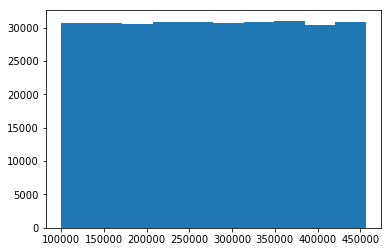

100303    1
131861    1
158488    1
156441    1
160539    1
150300    1
148253    1
154398    1
152351    1
238369    1
244514    1
242467    1
230181    1
236326    1
234279    1
254761    1
260906    1
135959    1
133908    1
248620    1
144147    1
176899    1
166660    1
164613    1
170758    1
168711    1
191240    1
189193    1
195338    1
193291    1
         ..
151011    1
161252    1
163301    1
157158    1
159207    1
136680    1
138729    1
132586    1
134635    1
144876    1
146925    1
239070    1
245213    1
243164    1
247250    1
210380    1
212429    1
206286    1
208335    1
251344    1
253393    1
249299    1
230874    1
259540    1
261589    1
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, dtype: int64
CNT_CHILDREN


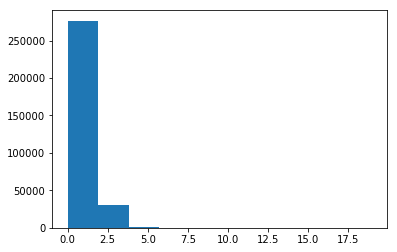

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
AMT_INCOME_TOTAL


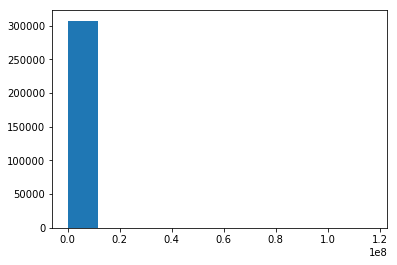

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5344
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
            ...  
100300.5        1
200794.5        1
100476.0        1
200961.0        1
200997.0        1
100507.5        1
100516.5        1
50274.0         1
201127.5        1
100566.0        1
402376.5        1
100629.0        1
201267.0        1
50323.5         1
201361.5        1
100786.5        1
201658.5        1
100854.0        1
245046.6        1
201811.5        1
403650.0        1
100944.0        1
58950.0         1
101083.5        1
404406.0  

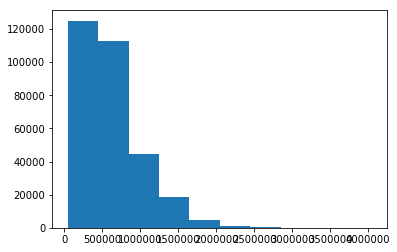

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
900000.0     6246
254700.0     4500
545040.0     4437
808650.0     4152
135000.0     3660
755190.0     3524
1125000.0    3493
521280.0     3175
284400.0     3096
1078200.0    2856
454500.0     2649
1288350.0    2613
269550.0     2463
202500.0     2339
781920.0     2328
1350000.0    2321
239850.0     2084
315000.0     2072
247500.0     2057
640080.0     2041
1006920.0    1883
540000.0     1821
360000.0     1743
508495.5     1717
592560.0     1688
             ... 
1639431.0       1
1242531.0       1
1649853.0       1
618903.0        1
1114011.0       1
1650771.0       1
207504.0        1
414981.0        1
829512.0        1
829440.0        1
2116395.0       1
308475.0        1
1234741.5       1
1234863.0       1
192024.0        1
1235344.5       1
828895.5        1
1657669.5       1
1407456.0       1
828346.5        1
828216.0        1
828081.0        1
3312162.0       1
1236393.0       1
1654560.0 

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


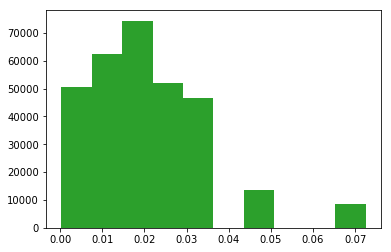

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

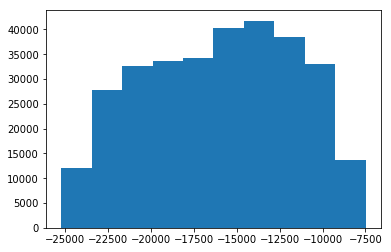

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
-10292    40
-14395    39
-14267    39
-13263    39
-11664    39
-13584    38
-15565    38
-13788    38
-13480    38
-15042    38
-13634    38
-13891    38
-14791    38
-13217    37
-15450    37
-10136    37
-20074    37
-15048    37
-16690    37
-10107    37
-15563    37
-14790    37
-14767    37
-10192    37
-14890    37
          ..
-24973     1
-25229     1
-25055     1
-25091     1
-25026     1
-25063     1
-25030     1
-24525     1
-25143     1
-25036     1
-7827      1
-16436     1
-7679      1
-8000      1
-25029     1
-24964     1
-7954      1
-24862     1
-7489      1
-25118     1
-24962     1
-25139     1
-7997      1
-16440     1
-24711     1
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, dtype: int64
DAYS_EMPLOYED


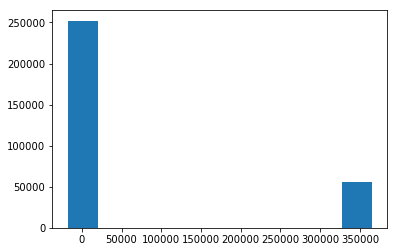

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

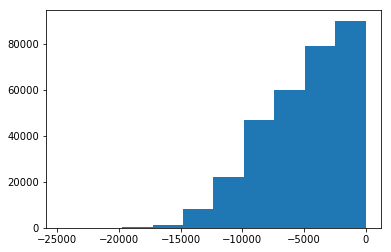

-1.0        113
-7.0         98
-6.0         96
-2.0         92
-4.0         92
-5.0         86
-9.0         84
-3.0         84
 0.0         80
-21.0        80
-14.0        80
-10.0        79
-11.0        67
-511.0       66
-15.0        66
-8.0         65
-56.0        65
-23.0        64
-41.0        63
-621.0       63
-20.0        62
-19.0        62
-13.0        62
-34.0        62
-69.0        62
-70.0        62
-29.0        61
-812.0       61
-742.0       61
-679.0       61
           ... 
-16782.0      1
-15846.0      1
-15275.0      1
-14606.0      1
-14963.0      1
-19660.0      1
-16528.0      1
-17330.0      1
-16296.0      1
-17964.0      1
-14374.0      1
-14953.0      1
-14941.0      1
-16098.0      1
-14943.0      1
-15292.0      1
-16129.0      1
-19488.0      1
-14876.0      1
-17212.0      1
-15809.0      1
-14372.0      1
-15542.0      1
-15285.0      1
-15811.0      1
-12446.0      1
-17298.0      1
-14676.0      1
-15817.0      1
-13267.0      1
Name: DAYS_REGISTRATION,

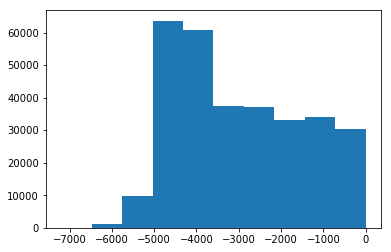

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
-4151    157
-4032    157
-4200    156
-4214    155
-4171    155
-4285    154
-4270    154
-4096    154
-4047    154
-4263    153
-4375    152
-4291    151
-4074    150
-4220    150
-4144    150
-4166    149
-4319    148
-4389    148
-4320    148
-4130    148
-4312    147
-4081    147
-4221    147
-4264    146
-4073    146
        ... 
-5826      1
-6337      1
-5960      1
-6274      1
-6162      1
-6201      1
-5868      1
-6220      1
-5652      1
-6016      1
-6086      1
-6015      1
-5862      1
-6135      1
-6028      1
-5879      1
-6211      1
-5915      1
-6212      1
-5955      1
-6074      1
-6029      1
-5913      1
-6206      1
-6117      1
-5696      1
-6073      1
-6076      1
-6176      1
-6189      1
Name: DAYS_ID_PUBLISH, dtype: int64
OWN_CAR_AGE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT


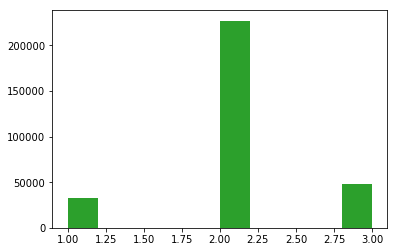

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64
REGION_RATING_CLIENT_W_CITY


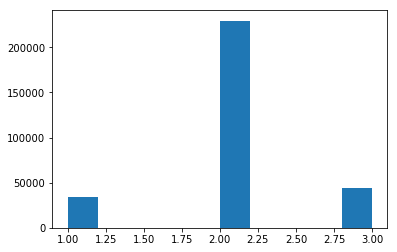

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
HOUR_APPR_PROCESS_START


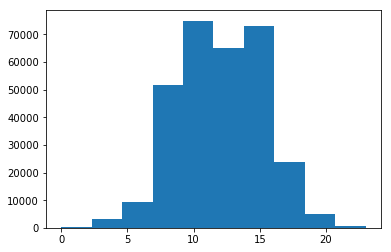

10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MED

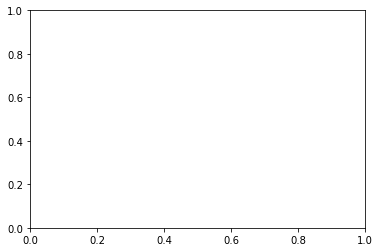

In [121]:
# 先篩選數值型的欄位
numeric_columns = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        numeric_columns.append(feature)
    elif dtype == 'int64':
        numeric_columns.append(feature)
print(len(numeric_columns))
#dtype_select = []
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
#print(numeric_columns)
#print(len(numeric_columns))
print("Numbers of remain columns" + str(len(numeric_columns)))

errorCol = []
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    #print(col)
    #x = str(col)
    #print(app_train[col].describe())
    try:
        print(col)
        plt.hist(app_train[col])
        plt.show()
        print(app_train[col].value_counts())
    except:
        errorCol.append(col)

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


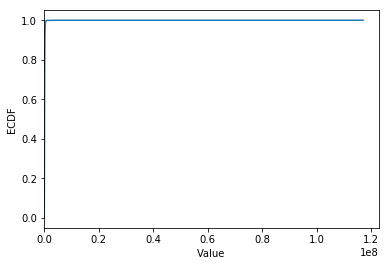

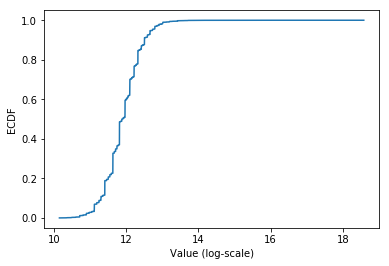

In [131]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
#ECDF是透過計算出相異數個數，並排序，再利用累計的相加數來算出
#找到的網址https://medium.com/@search.psop/%E7%AC%AC%E4%BA%8C%E5%B1%86%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%99%BE%E6%97%A5%E9%A6%AC%E6%8B%89%E6%9D%BEday6-a5615f48e06e
cdf = app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


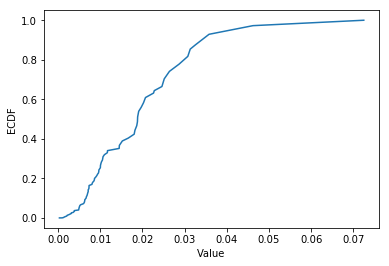

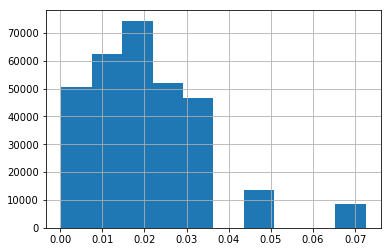

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [132]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


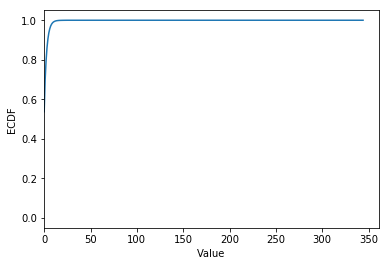

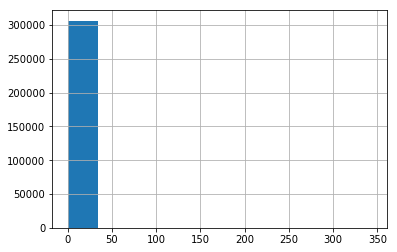

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [134]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [ ]:
app_train.loc[loc_a, loc_b].hist()
plt.show()

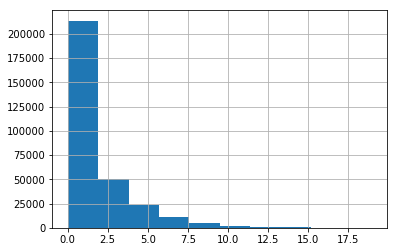

In [137]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train["OBS_60_CNT_SOCIAL_CIRCLE"] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()